In [63]:
import pandas as pd
import numpy as np

In [64]:
df = pd.read_csv("47.csv")

In [65]:
df.head(10)

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,179.0,177.0,182.0
1,female,group A,master's degree,free/reduced,none,176.0,195.0,196.0
2,male,group B,master's degree,free/reduced,none,197.0,195.0,193.0
3,male,group B,bachelor's degree,free/reduced,none,154.0,162.0,152.0
4,male,group E,some high school,free/reduced,none,199.0,183.0,183.0
5,male,group C,associate's degree,free/reduced,none,178.0,188.0,186.0
6,female,group E,associate's degree,free/reduced,completed,195.0,195.0,200.0
7,female,group B,bachelor's degree,free/reduced,none,147.0,148.0,115.0
8,female,group E,associate's degree,free/reduced,none,171.0,169.0,120.0
9,male,group E,bachelor's degree,free/reduced,completed,184.0,165.0,158.0


In [66]:
df['math score'].describe()

count    997.000000
mean     171.002006
std       17.668466
min      100.000000
25%      161.000000
50%      172.000000
75%      183.000000
max      200.000000
Name: math score, dtype: float64

In [67]:
df.describe()

,math score,reading score,writing score
count,997.000000,1000.000000,996.000000
mean,171.002006,172.398000,173.106426
std,17.668466,17.314369,18.113176
min,100.000000,103.000000,101.000000
25%,161.000000,163.000000,163.000000
50%,172.000000,175.000000,176.000000
75%,183.000000,184.000000,186.000000
max,200.000000,200.000000,200.000000


In [68]:
df.dtypes

gender                          object
race                            object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [69]:
df['percentage']=(df['math score']+df['reading score']+df['writing score'])/3 -100
df.describe()

,math score,reading score,writing score,percentage
count,997.000000,1000.000000,996.000000,994.000000
mean,171.002006,172.398000,173.106426,72.197518
std,17.668466,17.314369,18.113176,14.364117
min,100.000000,103.000000,101.000000,15.666667
25%,161.000000,163.000000,163.000000,62.333333
50%,172.000000,175.000000,176.000000,73.500000
75%,183.000000,184.000000,186.000000,82.583333
max,200.000000,200.000000,200.000000,100.000000


In [70]:
print(df['gender'].isnull().value_counts())
print(df['race'].isnull().value_counts())
print(df['parental level of education'].isnull().value_counts())
print(df['lunch'].isnull().value_counts())
print(df['test preparation course'].isnull().value_counts())

False    1000
Name: gender, dtype: int64
False    1000
Name: race, dtype: int64
False    994
True       6
Name: parental level of education, dtype: int64
False    1000
Name: lunch, dtype: int64
False    1000
Name: test preparation course, dtype: int64


In [71]:
nan=df.isna()
nanc=nan.any()
nanc

gender                         False
race                           False
parental level of education     True
lunch                          False
test preparation course        False
math score                      True
reading score                  False
writing score                   True
percentage                      True
dtype: bool

In [72]:

df=df.dropna(subset=['parental level of education'])


In [73]:
nan=df.isna()
nanc=nan.any()
nanc

gender                         False
race                           False
parental level of education    False
lunch                          False
test preparation course        False
math score                      True
reading score                  False
writing score                   True
percentage                      True
dtype: bool

In [77]:
df['math score'].fillna(df['math score'].mean(),inplace=True)
df['writing score'].fillna(df['writing score'].mean(),inplace=True)
df['percentage'].fillna(df['percentage'].mean(),inplace=True)
df['math score'].isnull().sum()

0

In [43]:
import matplotlib.pyplot as plt

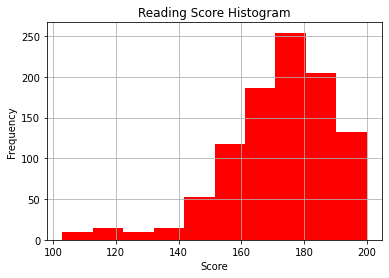

In [78]:
df['reading score'].hist(histtype='stepfilled', color='red')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Reading Score Histogram')
plt.show()

# this plot shows that the data is left skewed and follows normal distribution
#

In [91]:
grade=list()
for i in df['percentage']:
    if(i>90):
        grade.append('S')
    elif(i>80 and i<=90):
        grade.append('A')
    elif(i>70 and i<=80):
        grade.append('B')
    elif(i>60 and i<=70):
        grade.append('C')
    elif(i>40 and i<=60):
        grade.append('D')
    else:
        grade.append('F')

In [93]:
grade
df['grade']=grade

In [94]:
df


,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,grade
0,female,group B,bachelor's degree,standard,none,179.0,177.0,182.0,79.333333,B
1,female,group A,master's degree,free/reduced,none,176.0,195.0,196.0,89.000000,A
2,male,group B,master's degree,free/reduced,none,197.0,195.0,193.0,95.000000,S
3,male,group B,bachelor's degree,free/reduced,none,154.0,162.0,152.0,56.000000,D
4,male,group E,some high school,free/reduced,none,199.0,183.0,183.0,88.333333,A
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,bachelor's degree,free/reduced,none,195.0,199.0,129.0,74.333333,B
996,female,group B,high school,standard,completed,138.0,143.0,163.0,48.000000,D
997,female,group A,associate's degree,free/reduced,none,166.0,176.0,173.0,71.666667,B
998,male,group E,high school,free/reduced,completed,175.0,183.0,185.0,81.000000,A


In [95]:
df['parental level of education'].value_counts()

associate's degree    520
high school           151
bachelor's degree     151
some high school       98
master's degree        45
some college           29
Name: parental level of education, dtype: int64

In [ ]:
#Grouped Bar Chart
x = [1, 2, 3, 4]
men = [4, 3, 8, 5]
women = [2, 5, 9, 10]
labels = ['athletics', 'aquatics', 'hockey', 'tennis']

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index,men, bar_width,
alpha=opacity,
color='b',
label='Men')

rects2 = plt.bar(index + bar_width, women, bar_width,
alpha=opacity,
color='g',
label='Women')

plt.xlabel('Sports')
plt.ylabel('Count')
plt.title('Count by sport')
plt.xticks(index + bar_width, labels)
plt.legend()

plt.tight_layout()
plt.show()

In [96]:
srs=df.sample(n=100)

In [97]:
srs

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,grade
396,female,group B,associate's degree,free/reduced,none,157.0,172.0,171.0,66.666667,C
489,female,group E,associate's degree,free/reduced,none,100.0,187.0,190.0,59.000000,D
862,male,group C,associate's degree,free/reduced,none,146.0,147.0,146.0,46.333333,D
409,female,group E,bachelor's degree,free/reduced,none,194.0,189.0,157.0,80.000000,B
687,female,group C,bachelor's degree,free/reduced,completed,184.0,183.0,181.0,82.666667,A
...,...,...,...,...,...,...,...,...,...,...
608,male,group C,master's degree,free/reduced,none,168.0,169.0,170.0,69.000000,C
566,female,group E,some high school,free/reduced,none,199.0,200.0,200.0,99.666667,S
239,female,group E,associate's degree,free/reduced,none,191.0,193.0,188.0,90.666667,S
950,female,group E,associate's degree,free/reduced,none,194.0,178.0,179.0,83.666667,A


In [98]:
df['race'].value_counts()

group E    469
group C    266
group B    169
group A     61
group D     29
Name: race, dtype: int64

In [99]:
strati=df.groupby('race', group_keys=False).apply(lambda x: x.sample(20))

In [100]:
strati


,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,grade
364,female,group A,associate's degree,free/reduced,completed,166.0,165.0,191.0,74.000000,B
417,female,group A,associate's degree,standard,none,181.0,178.0,175.0,78.000000,B
918,male,group A,some college,free/reduced,completed,175.0,182.0,188.0,81.666667,A
762,female,group A,associate's degree,free/reduced,none,185.0,186.0,194.0,88.333333,A
926,female,group A,some high school,free/reduced,none,171.0,161.0,160.0,64.000000,C
...,...,...,...,...,...,...,...,...,...,...
499,female,group E,associate's degree,free/reduced,none,183.0,176.0,180.0,79.666667,B
336,female,group E,associate's degree,free/reduced,none,183.0,175.0,177.0,78.333333,B
55,male,group E,master's degree,free/reduced,none,140.0,146.0,151.0,45.666667,D
333,male,group E,high school,free/reduced,completed,197.0,183.0,189.0,89.666667,A


In [102]:
simple_mean=srs['math score'].mean()

In [103]:
strati_mean=strati['math score'].mean()

In [105]:
simple_mean

168.5

In [106]:
strati_mean

172.72

In [109]:
df_mean=df['math score'].mean()
print(abs(df_mean-simple_mean))
print(abs(df_mean-strati_mean))
#error is low in stratified sampling error

2.504036326942469
1.71596367305753


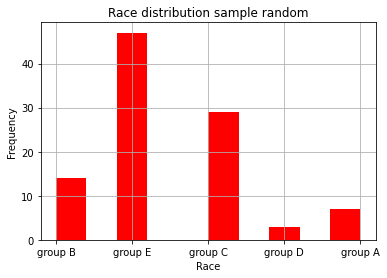

In [115]:
srs['race'].hist(histtype='stepfilled', color='red')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.title('Race distribution sample random')
plt.show()

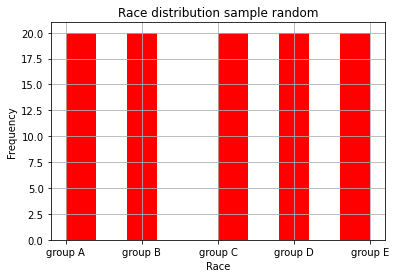

In [114]:
strati['race'].hist(histtype='stepfilled', color='red')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.title('Race distribution sample random')
plt.show()

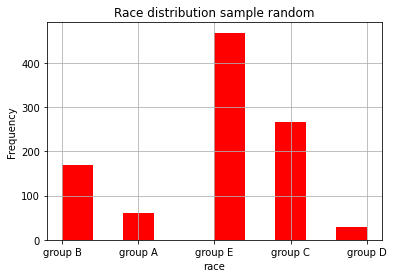

In [116]:
df['race'].hist(histtype='stepfilled', color='red')
plt.xlabel('race')
plt.ylabel('Frequency')
plt.title('Race distribution sample random')
plt.show()

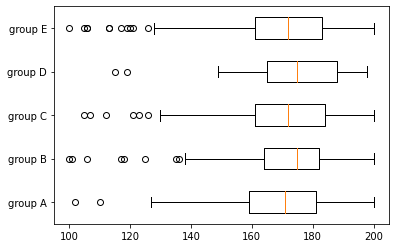

In [120]:
gam=df[df['race']=='group A']['math score']
gbm=df[df['race']=='group B']['math score']
gcm=df[df['race']=='group C']['math score']
gdm=df[df['race']=='group D']['math score']
gem=df[df['race']=='group E']['math score']
values=[gam,gbm,gcm,gdm,gem]
plt.boxplot(values, vert=False,labels=['group A','group B','group C','group D','group E'])   
plt.show()

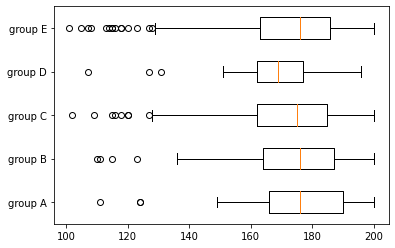

In [121]:
gaw=df[df['race']=='group A']['writing score']
gbw=df[df['race']=='group B']['writing score']
gcw=df[df['race']=='group C']['writing score']
gdw=df[df['race']=='group D']['writing score']
gew=df[df['race']=='group E']['writing score']
values1=[gaw,gbw,gcw,gdw,gew]
plt.boxplot(values1, vert=False,labels=['group A','group B','group C','group D','group E'])   
plt.show()

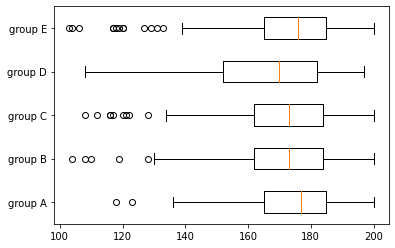

In [122]:
gar=df[df['race']=='group A']['reading score']
gbr=df[df['race']=='group B']['reading score']
gcr=df[df['race']=='group C']['reading score']
gdr=df[df['race']=='group D']['reading score']
ger=df[df['race']=='group E']['reading score']
values=[gar,gbr,gcr,gdr,ger]
plt.boxplot(values, vert=False,labels=['group A','group B','group C','group D','group E'])   
plt.show()

In [123]:
male=df[df['gender']=='male']['parental level of education']
female=df[df['gender']=='female']['parental level of education']

In [132]:
male_counts = male.value_counts(normalize=True)

In [133]:
female_count=female.value_counts(normalize=True)

In [137]:
male_counts=male_counts*100

In [138]:
female_count=female_count*100

In [141]:
mc=list(male_counts)
fc=list(female_count)

In [143]:
ln=(range(1,len(mc)+1))

In [144]:
ln


range(1, 7)

In [145]:
len(mc)

6

In [146]:
len(fc)

6

In [147]:
male_counts


associate's degree    50.295858
bachelor's degree     15.680473
high school           15.384615
some high school      10.355030
master's degree        5.621302
some college           2.662722
Name: parental level of education, dtype: float64

In [148]:
labels=['associate\'s degree','bachelor\'s degree','high school','some high school','master\'s degree','some college']

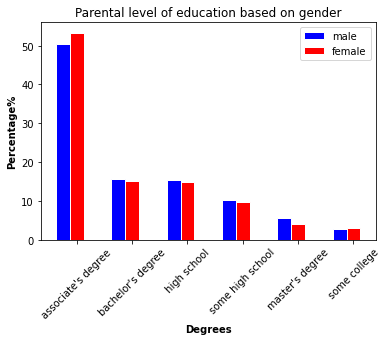

In [158]:
barWidth = 0.25
r1=np.arange(len(mc))
r2=[x+barWidth for x in r1]
plt.bar(r1, mc, color='blue', width=barWidth, edgecolor='white', label='male')
plt.bar(r2, fc, color='red', width=barWidth, edgecolor='white', label='female')
plt.xlabel('Degrees', fontweight='bold')
plt.ylabel('Percentage%',fontweight='bold')
plt.title('Parental level of education based on gender')
plt.xticks([r + barWidth for r in range(len(mc))], labels,rotation=45)
plt.legend()
plt.show()